# PyTorch: custom nn module

가끔은 기존 모듈의 순차적 구성보다 더 복잡한 모델을 구성해야 할 때가 있습니다; 이럴 때는 nn.Module 의 서브클래스로 새 모듈을 정의하고, 입력 Tensor를 받아 다른 모듈 또는 Tensor의 autograd 연산을 사용하여 출력 Tensor를 생성하는 forward 를 정의합니다.

이 예제에서는 2-계층 신경망을 사용자 정의 Module의 서브클래스로 구현해보겠습니다:

In [0]:
import torch
import matplotlib.pyplot as plt 
% matplotlib inline

In [0]:
class TwoLayerNet(torch.nn.Module):
  def __init__(self, D_in, H, D_out):
    super(TwoLayerNet, self).__init__()
    self.linear1 = torch.nn.Linear(D_in, H)
    self.linear2 = torch.nn.Linear(H, D_out)
  
  def forward(self, x):
    h = self.linear1(x).clamp(min=0)
    y_pred = self.linear2(h)
    return y_pred

In [0]:
N, D_in, H, D_out = 64, 1000, 100, 10

In [0]:
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

In [31]:
model = TwoLayerNet(D_in, H, D_out)
print(model)

TwoLayerNet(
  (linear1): Linear(in_features=1000, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=10, bias=True)
)


In [32]:
criterion = torch.nn.MSELoss(size_average=False)
learning_rate = 1e-4
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [0]:
steps = []
loss_values = []

In [34]:
for t in range(500):
    # 순전파 단계: 모델에 x를 전달하여 예상하는 y 값을 계산합니다.
    y_pred = model(x)

    # 손실을 계산하고 출력합니다.
    loss = criterion(y_pred, y)
    print(t, loss.item())
    
    steps.append(t)
    loss_values.append(loss.item())

    # 변화도를 0으로 만들고, 역전파 단계를 수행하고, 가중치를 갱신합니다.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 674.1918334960938
1 626.0459594726562
2 584.160888671875
3 547.0133666992188
4 513.8104858398438
5 484.11578369140625
6 456.97479248046875
7 431.8399353027344
8 408.804443359375
9 387.5660095214844
10 367.6049499511719
11 348.82135009765625
12 330.9901123046875
13 313.9225769042969
14 297.71563720703125
15 282.2783508300781
16 267.6513366699219
17 253.67782592773438
18 240.42550659179688
19 227.80113220214844
20 215.68096923828125
21 204.13555908203125
22 193.1106719970703
23 182.6233367919922
24 172.62648010253906
25 163.0825958251953
26 153.98016357421875
27 145.30142211914062
28 137.05865478515625
29 129.22862243652344
30 121.7824935913086
31 114.71765899658203
32 108.01988983154297
33 101.65990447998047
34 95.64642333984375
35 89.97537994384766
36 84.61859893798828
37 79.56757354736328
38 74.79674530029297
39 70.30097961425781
40 66.06934356689453
41 62.088069915771484
42 58.34318542480469
43 54.82926940917969
44 51.525962829589844
45 48.428253173828125
46 45.51964569091797
47 42

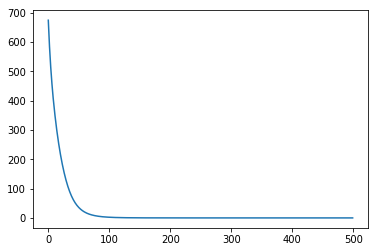

In [35]:
plt.plot(steps, loss_values)
plt.show()

In [0]:
import torch 
import matplotlib.pyplot as plt 
% matplotlib inline

In [0]:
class Net(torch.nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Net, self).__init__()
    self.linear1 = torch.nn.Linear(D_in, H)
    self.linear2 = torch.nn.Linear(H, D_out)
    
  def forward(self, x):
    x = self.linear1(x).clamp(min=0)
    y_pred = self.linear2(x)
    return y_pred

In [0]:
N, D_in, H, D_out = 128, 1000, 100, 10

In [0]:
net = Net(D_in, H, D_out)

In [0]:
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

In [41]:
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [0]:
steps = []
loss_values = []

In [43]:
for t in range(500):
  y_pred = net(x)
  loss = criterion(y_pred, y)
  
  print(t, loss.item())
  
  steps.append(t)
  loss_values.append(loss.item())
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

0 1247.4083251953125
1 1223.5662841796875
2 1200.1815185546875
3 1177.272216796875
4 1154.8465576171875
5 1132.863525390625
6 1111.332763671875
7 1090.2265625
8 1069.4859619140625
9 1049.197265625
10 1029.33349609375
11 1009.8958129882812
12 990.9240112304688
13 972.2841796875
14 954.0477294921875
15 936.2810668945312
16 918.9495849609375
17 901.919921875
18 885.20751953125
19 868.8587646484375
20 852.7957153320312
21 837.1329345703125
22 821.7852783203125
23 806.7959594726562
24 792.1087036132812
25 777.7006225585938
26 763.5269775390625
27 749.6023559570312
28 735.9546508789062
29 722.5359497070312
30 709.3580322265625
31 696.4251708984375
32 683.703857421875
33 671.2494506835938
34 659.0453491210938
35 647.0546875
36 635.2469482421875
37 623.6415405273438
38 612.2702026367188
39 601.0853881835938
40 590.0618286132812
41 579.2103881835938
42 568.5214233398438
43 557.9921264648438
44 547.6414184570312
45 537.458251953125
46 527.4461669921875
47 517.6262817382812
48 507.97088623046875


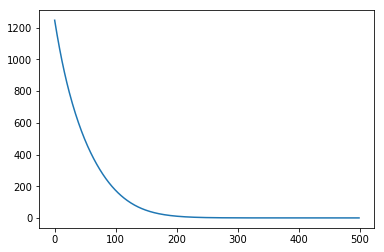

In [44]:
plt.plot(steps, loss_values)
plt.show()